<a href="https://colab.research.google.com/github/Javad1942/Group-2-QBC8/blob/Classification%2FMojtaba-Diana/HBN_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [8]:
hbn_path = 'HBN.csv'
data = pd.read_csv(hbn_path)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
محاسبه missing values هر ستون
</p>

In [9]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(data)) * 100
print("\nMissing Values (Count):")
print(missing_values)
print("\nMissing Values (Percentage):")
print(missing_percentage)


Missing Values (Count):
PAQ_A-PAQ_A_Total    3485
PAQ_A-Season         3485
FE-Time_Mins         3220
FE-Time_Sec          3220
FE-Max_Stage         3217
                     ... 
id                      0
Sex                     0
Age                     0
Enrol_Season            0
Unnamed: 0              0
Length: 83, dtype: int64

Missing Values (Percentage):
PAQ_A-PAQ_A_Total    88.005051
PAQ_A-Season         88.005051
FE-Time_Mins         81.313131
FE-Time_Sec          81.313131
FE-Max_Stage         81.237374
                       ...    
id                    0.000000
Sex                   0.000000
Age                   0.000000
Enrol_Season          0.000000
Unnamed: 0            0.000000
Length: 83, dtype: float64


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
می خواهیم ستون هایی که هم مقادیر گمشدشون بیش از 50% است هم همبستگی ضغیفی با ستون تارگت ما دارن رو شناسایی و حذف کنیم
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
محاسبه corrolation های ستون ها با ستون "sii"
</p>


Correlation of numeric features with target (sii):
sii                  1.000000
PCIAT-PCIAT_Total    0.899681
PCIAT-PCIAT_15       0.751399
PCIAT-PCIAT_18       0.731112
PCIAT-PCIAT_17       0.729867
                       ...   
FGC-FGC_SRR_Zone    -0.068528
FE-Max_Stage        -0.070589
CGAS-Score          -0.085261
Sex                 -0.100148
FGC-FGC_SRL_Zone    -0.112497
Length: 71, dtype: float64


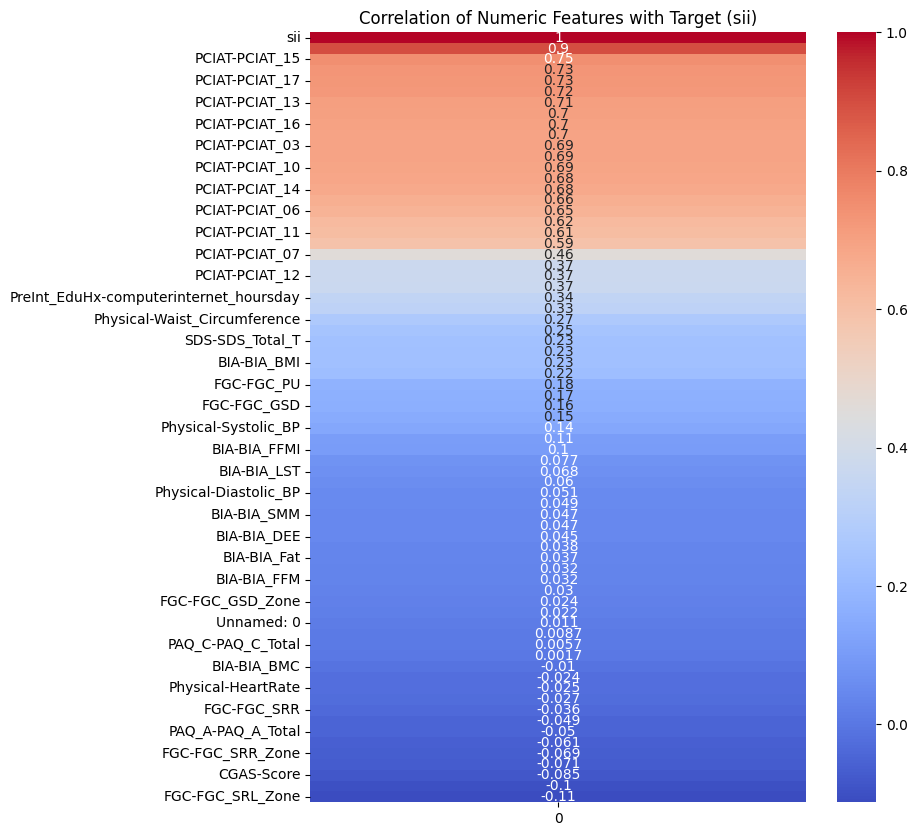

In [10]:
# انتخاب ستون‌های عددی
numeric_columns = data.select_dtypes(include=['number']).columns

# محاسبه همبستگی با متغیر هدف
correlation_with_target = data[numeric_columns].corrwith(data['sii'])

# نمایش همبستگی به صورت جدول
print("\nCorrelation of numeric features with target (sii):")
print(correlation_with_target.sort_values(ascending=False))

# رسم Heatmap از همبستگی
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_target.sort_values(ascending=False).to_frame(),
            annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation of Numeric Features with Target (sii)")
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
ستون هایی که corrolation ضغیف دارند
</p>

In [11]:
weak_correlation_columns = correlation_with_target[abs(correlation_with_target) < 0.1].index
print("\nColumns with weak correlation with sii (correlation < 0.1):")
print(weak_correlation_columns)


Columns with weak correlation with sii (correlation < 0.1):
Index(['Unnamed: 0', 'CGAS-Score', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'FE-Max_Stage', 'FE-Time_Mins', 'FE-Time_Sec',
       'FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone',
       'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM',
       'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total',
       'PAQ_C-PAQ_C_Total'],
      dtype='object')


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
ستون هایی که بیشتر از 50% missing values  دارن
</p>

In [12]:
high_missing_columns = missing_percentage[missing_percentage > 50].index
print("\nColumns with more than 50% missing values:")
print(high_missing_columns)


Columns with more than 50% missing values:
Index(['PAQ_A-PAQ_A_Total', 'PAQ_A-Season', 'FE-Time_Mins', 'FE-Time_Sec',
       'FE-Max_Stage', 'Physical-Waist_Circumference', 'FGC-FGC_GSND_Zone',
       'FGC-FGC_GSD_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSND', 'FE-Season',
       'PAQ_C-Season', 'PAQ_C-PAQ_C_Total'],
      dtype='object')


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
ستون هایی که هم بیش از 50% missing values  دارن و هم corrolation ضعیفی با ستون "sii" دارن
</p>

In [13]:
columns_to_drop = list(set(high_missing_columns).intersection(set(weak_correlation_columns)))
print("\nColumns to be dropped (high missing + weak correlation):")
print(columns_to_drop)


Columns to be dropped (high missing + weak correlation):
['FGC-FGC_GSND_Zone', 'FE-Time_Mins', 'FGC-FGC_GSD_Zone', 'PAQ_C-PAQ_C_Total', 'FE-Time_Sec', 'FE-Max_Stage', 'PAQ_A-PAQ_A_Total']


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
حذف 7 ستون
</p>

In [14]:
data = data.drop(columns=columns_to_drop)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
نمایش توزیع ستون هایی که missing values دارن برای اینکه راحت تر بنوانیم تصمیم بگیریم که missing values هر ستون را با چه روشی پر کنیم
</p>

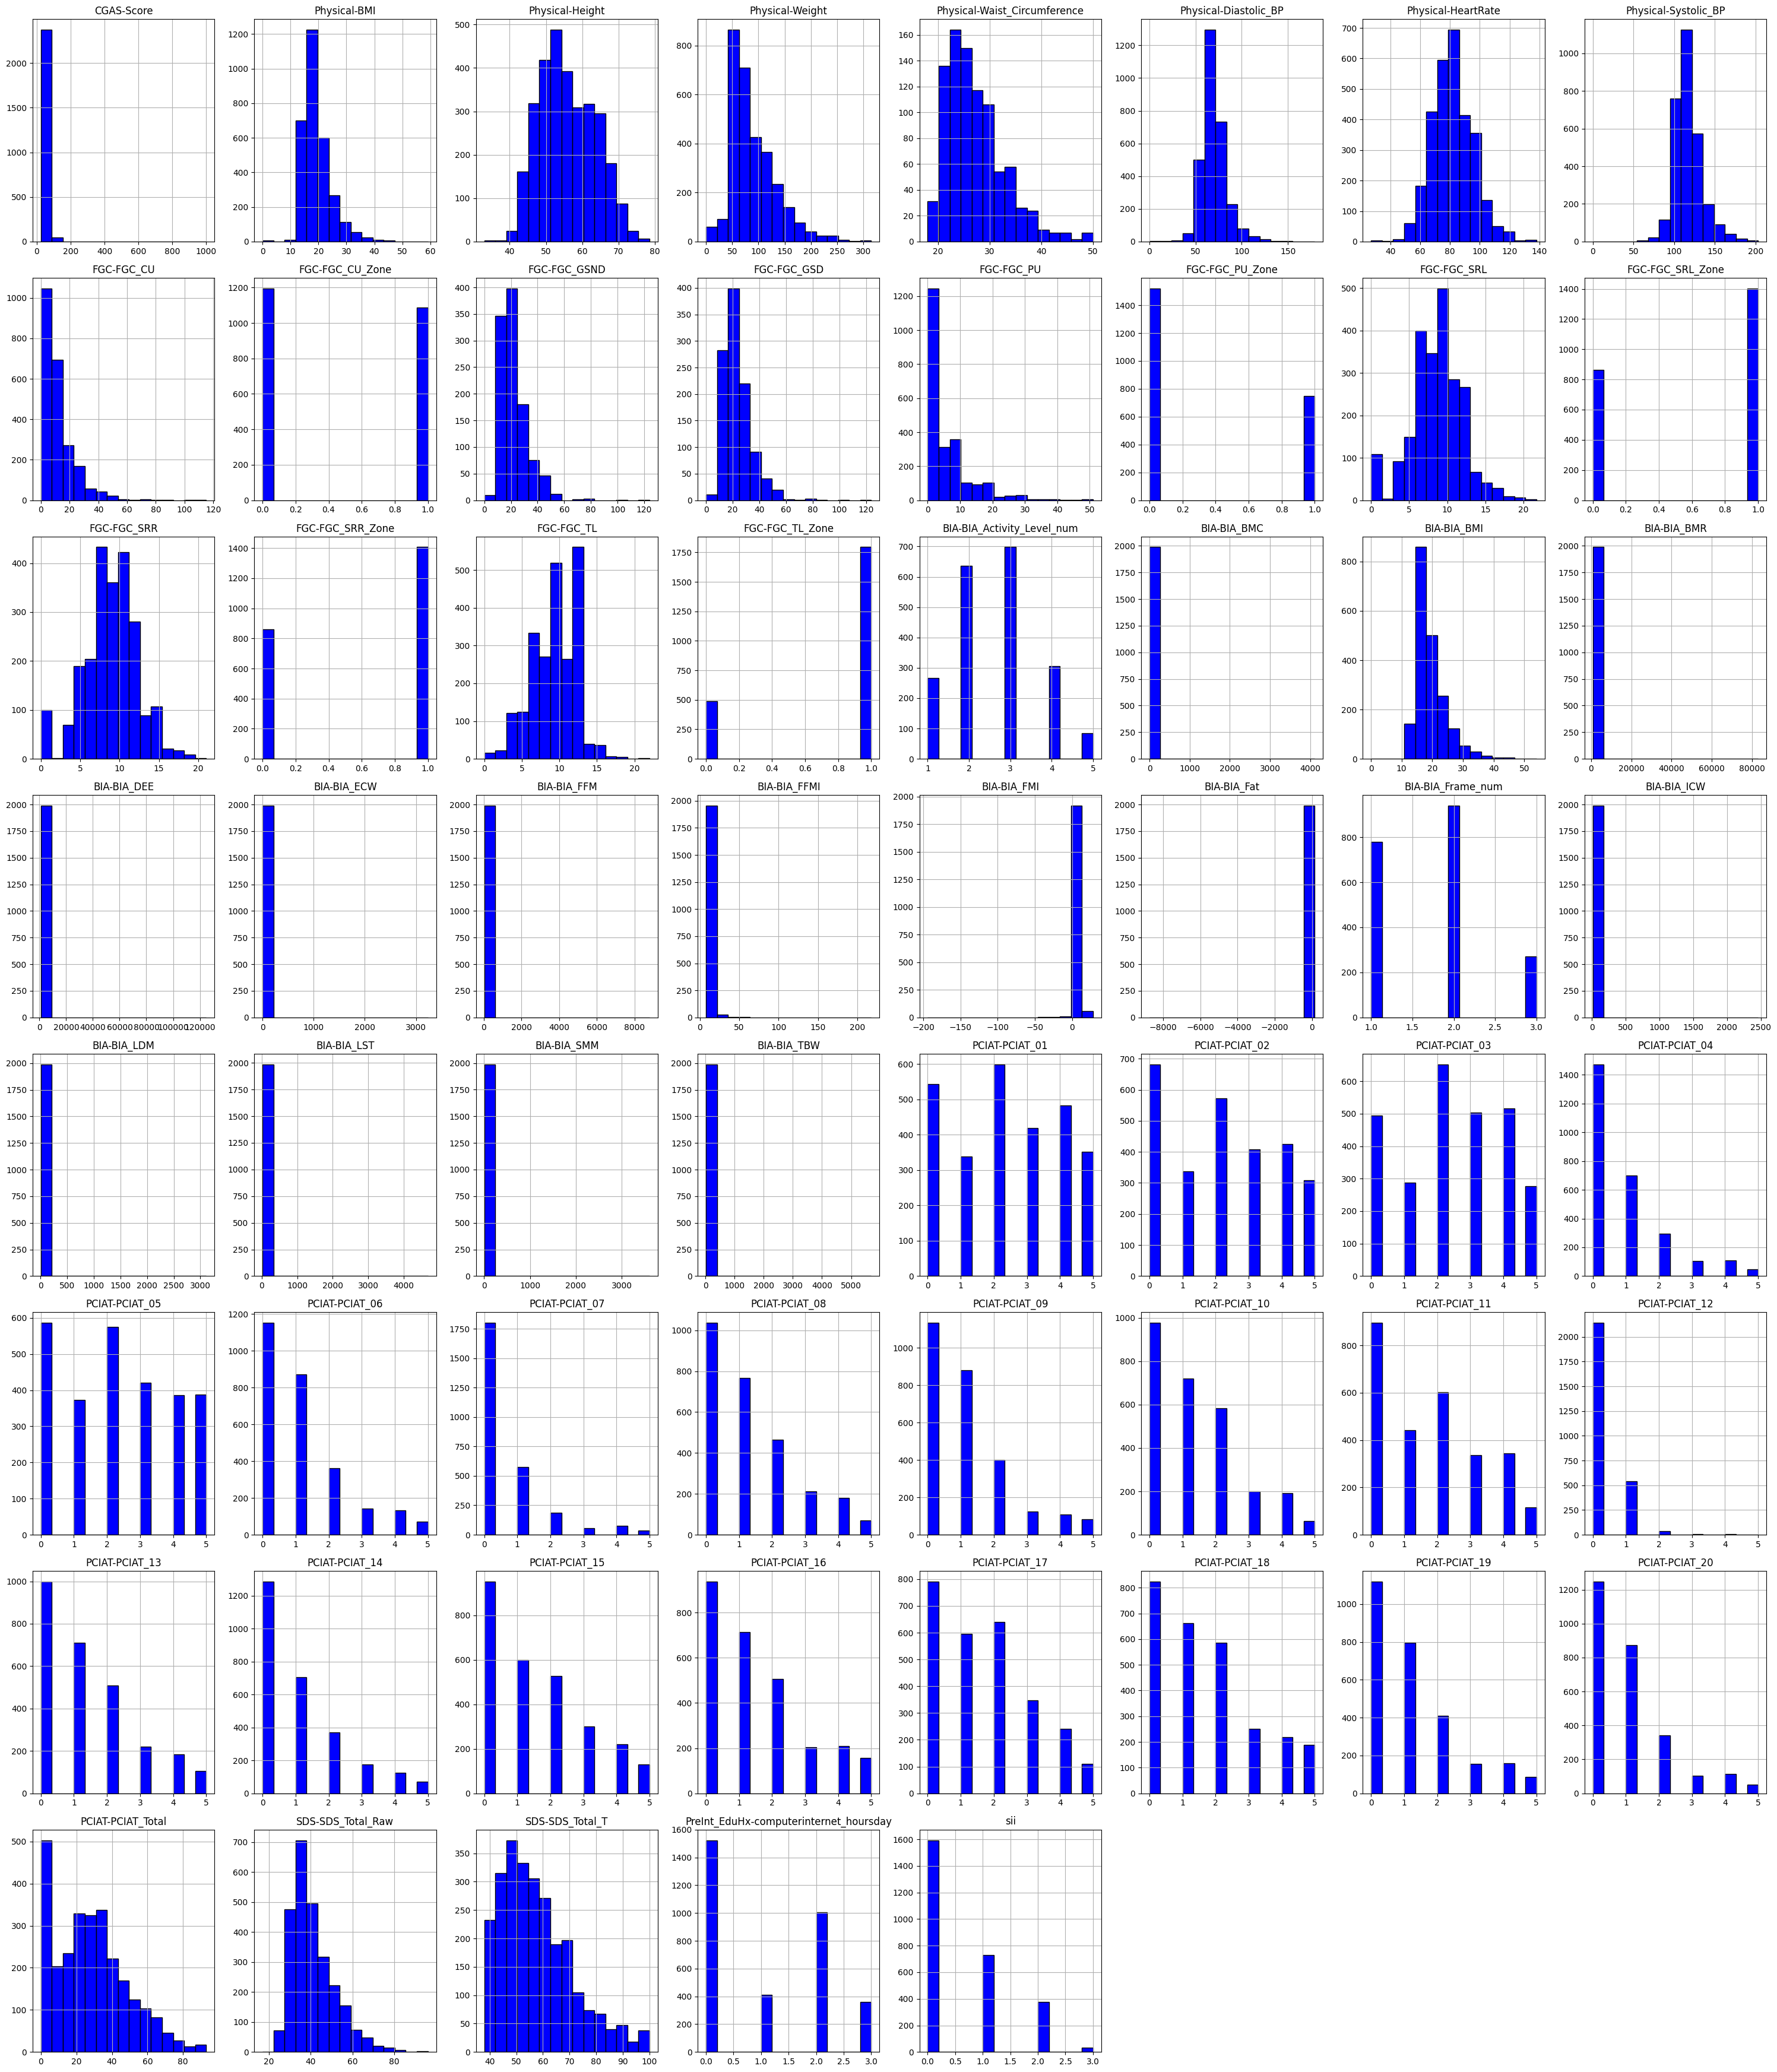


Percentage of missing values in columns:
PAQ_A-Season                              88.005051
Physical-Waist_Circumference              77.323232
FGC-FGC_GSND                              72.878788
FGC-FGC_GSD                               72.878788
FE-Season                                 66.969697
                                            ...    
Physical-Weight                           22.323232
PreInt_EduHx-computerinternet_hoursday    16.641414
Physical-Season                           16.414141
FGC-Season                                15.505051
PreInt_EduHx-Season                       10.606061
Length: 71, dtype: float64


In [15]:
missing_columns = data.columns[data.isnull().sum() > 0]

# رسم توزیع فقط برای ستون‌هایی که مقدار گمشده دارند
data[missing_columns].hist(figsize=(30, 35), bins=15, color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

# چاپ درصد مقادیر گمشده برای هر ستون
missing_percentage = (data[missing_columns].isnull().sum() / len(data)) * 100
print("\nPercentage of missing values in columns:")
print(missing_percentage.sort_values(ascending=False))

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
تفکیک ستون های عددی به سه دسته : 1- ستون هایی که توزیع نرمال دارند 2- ستونهایی که چولگی دارند 3- ستون های خاص(مقادیر گسسته و دسته بندی شده)
</p>

In [16]:
# انتخاب ستون‌های عددی
numeric_columns = data.select_dtypes(include=['number']).columns

# فیلتر کردن ستون‌هایی که مقادیر گمشده دارند
numeric_missing_columns = [col for col in numeric_columns if data[col].isnull().sum() > 0]

# لیست‌های جداگانه برای ستون‌های نرمال، چولگی‌دار و خاص
normal_columns = []
skewed_columns = []
special_columns = []

# بررسی چولگی و تصمیم‌گیری فقط برای ستون‌های عددی با مقادیر گمشده
for col in numeric_missing_columns:
    skewness = data[col].skew()
    print(f"Column: {col}, Skewness: {skewness}")

    if data[col].nunique() <= 10:
        print("این ستون خاص است (گسسته یا دسته‌بندی‌شده).")
        special_columns.append(col)
    elif abs(skewness) < 0.5:
        print("این ستون تقریباً نرمال است.")
        normal_columns.append(col)
    else:
        print("این ستون چولگی دارد.")
        skewed_columns.append(col)


print("\nColumns categorized:")
print(f"Normal Columns (Mean): {normal_columns}")
print(f"Skewed Columns (Median): {skewed_columns}")
print(f"Special Columns (Mode): {special_columns}")

Column: CGAS-Score, Skewness: 30.140856434188393
این ستون چولگی دارد.
Column: Physical-BMI, Skewness: 1.6321945187703888
این ستون چولگی دارد.
Column: Physical-Height, Skewness: 0.2585221532173183
این ستون تقریباً نرمال است.
Column: Physical-Weight, Skewness: 1.184011631997265
این ستون چولگی دارد.
Column: Physical-Waist_Circumference, Skewness: 1.241353050125788
این ستون چولگی دارد.
Column: Physical-Diastolic_BP, Skewness: 1.2007459024813003
این ستون چولگی دارد.
Column: Physical-HeartRate, Skewness: 0.2595964024436552
این ستون تقریباً نرمال است.
Column: Physical-Systolic_BP, Skewness: 0.8318020042266645
این ستون چولگی دارد.
Column: FGC-FGC_CU, Skewness: 2.150664419260026
این ستون چولگی دارد.
Column: FGC-FGC_CU_Zone, Skewness: 0.0948223351887421
این ستون خاص است (گسسته یا دسته‌بندی‌شده).
Column: FGC-FGC_GSND, Skewness: 2.4190638064293943
این ستون چولگی دارد.
Column: FGC-FGC_GSD, Skewness: 2.2433670830372385
این ستون چولگی دارد.
Column: FGC-FGC_PU, Skewness: 2.036107975269801
این ستون چول

In [17]:
# پر کردن ستون‌های نرمال با میانگین
for col in normal_columns:
    data[col] = data[col].fillna(data[col].mean())

# پر کردن ستون‌های چولگی‌دار با میانه
for col in skewed_columns:
    data[col] = data[col].fillna(data[col].median())

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
بررسی ستون های خاص از لحاظ تعداد دسته برای اینکه تصمیم بگیریم به چه روشی missing values هر ستون رو پر کنیم
</p>

In [18]:
special_columns_categorical = [col for col in special_columns if data[col].nunique() <= 10]
special_columns_complex = [col for col in special_columns if col not in special_columns_categorical]
print(f"special_columns_categorical: {special_columns_categorical}")
print(f"special_columns_complex: {special_columns_complex}")

special_columns_categorical: ['FGC-FGC_CU_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_Frame_num', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PreInt_EduHx-computerinternet_hoursday', 'sii']
special_columns_complex: []


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
پر کردن missing values ستون ها ی خاص به روش random sampling
</p>

In [19]:
# پر کردن مقادیر گمشده برای ستون‌های خاص
for col in special_columns_categorical:

    # محاسبه توزیع مقادیر موجود
    value_counts = data[col].value_counts(normalize=True)

    # پیدا کردن ردیف‌های دارای مقدار گمشده
    missing_indices = data[data[col].isnull()].index

    # پر کردن مقادیر گمشده با نمونه‌گیری تصادفی
    data.loc[missing_indices, col] = np.random.choice(value_counts.index,
                                                      size=len(missing_indices),
                                                      p=value_counts.values)

In [20]:
# بررسی تعداد مقادیر گمشده باقی‌مانده در هر ستون
missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("\nColumns with missing values after filling:")
print(missing_columns)

# نمایش درصد مقادیر گمشده در صورت وجود
if not missing_columns.empty:
    missing_percentage = (missing_columns / len(data)) * 100
    print("\nPercentage of missing values in remaining columns:")
    print(missing_percentage.sort_values(ascending=False))
else:
    print("\nNo missing values remain in the dataset.")


Columns with missing values after filling:
CGAS-Season            1405
Physical-Season         650
FE-Season              2652
FGC-Season              614
BIA-Season             1815
PAQ_A-Season           3485
PAQ_C-Season           2239
PCIAT-Season           1224
SDS-Season             1342
PreInt_EduHx-Season     420
dtype: int64

Percentage of missing values in remaining columns:
PAQ_A-Season           88.005051
FE-Season              66.969697
PAQ_C-Season           56.540404
BIA-Season             45.833333
CGAS-Season            35.479798
SDS-Season             33.888889
PCIAT-Season           30.909091
Physical-Season        16.414141
FGC-Season             15.505051
PreInt_EduHx-Season    10.606061
dtype: float64


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium;">
بعد از پر کردن ستون های عددی نوبت به ستون های غیر عددی می رسد.
رسم توزیع ستون های غیر عددی
</p>

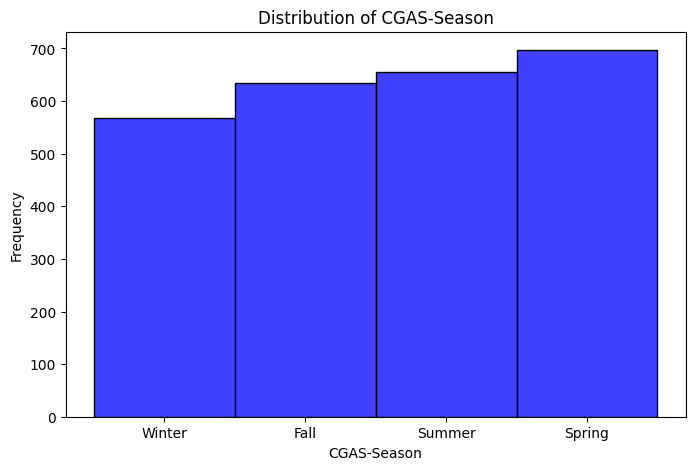

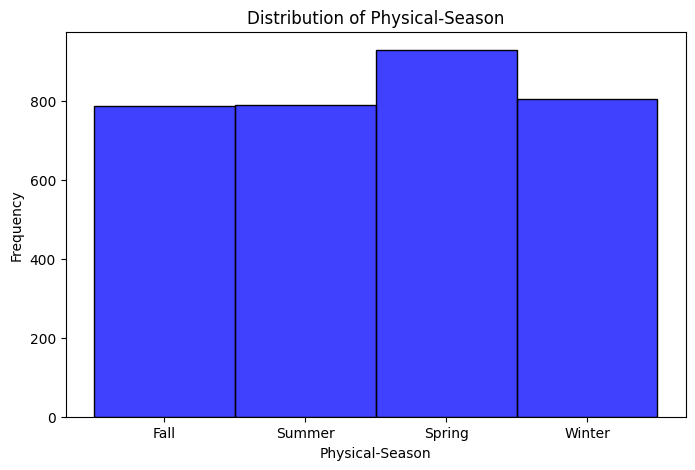

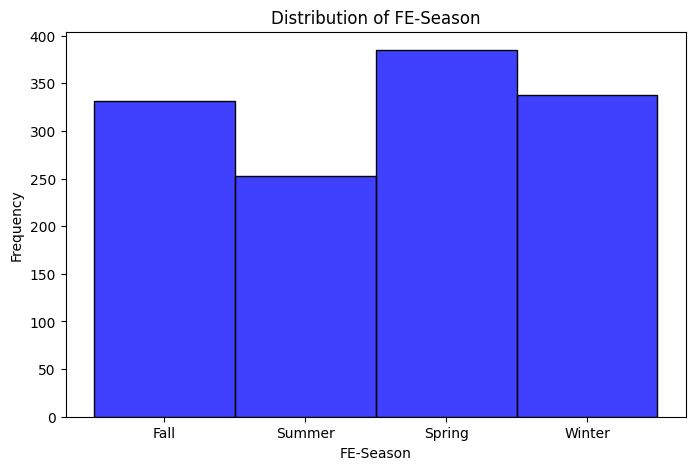

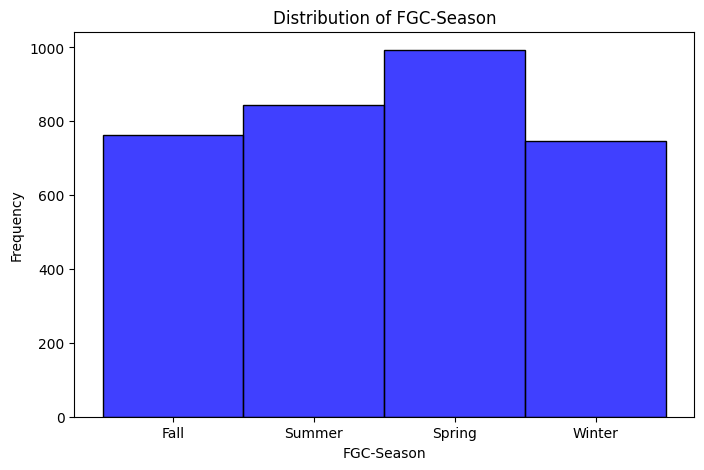

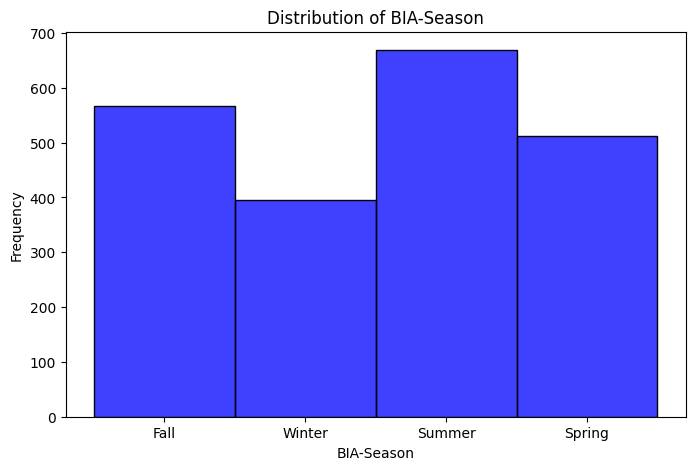

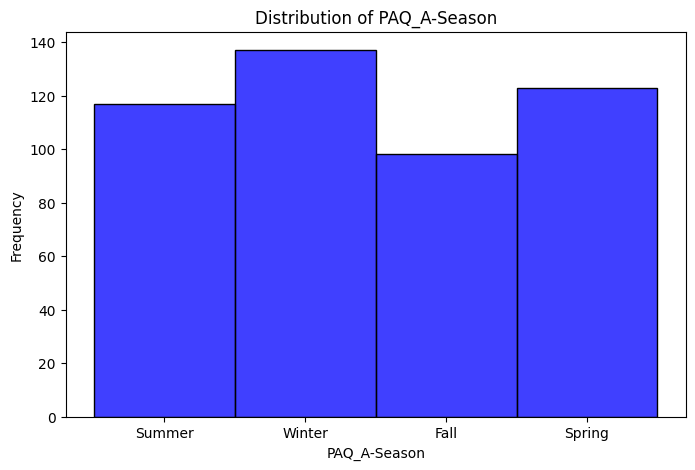

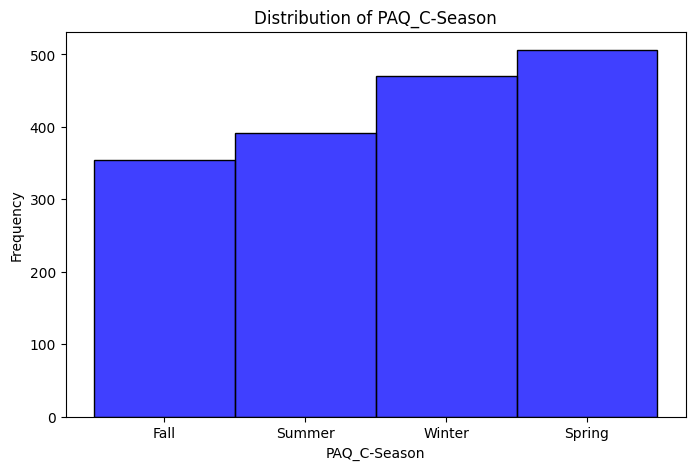

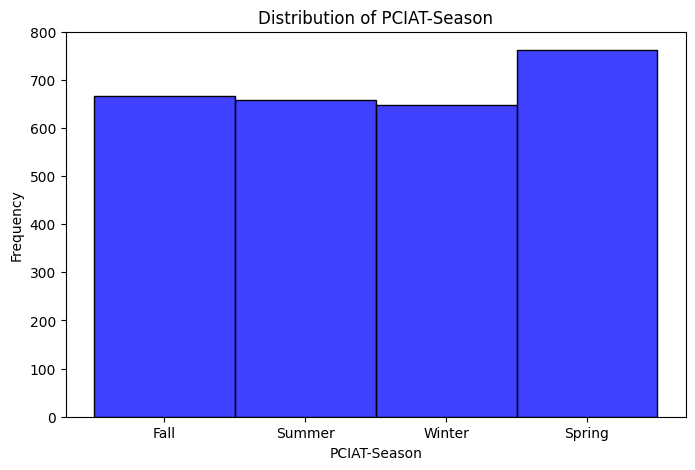

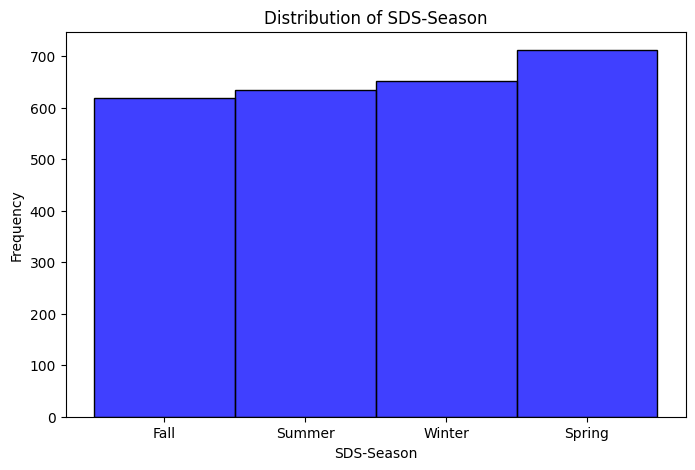

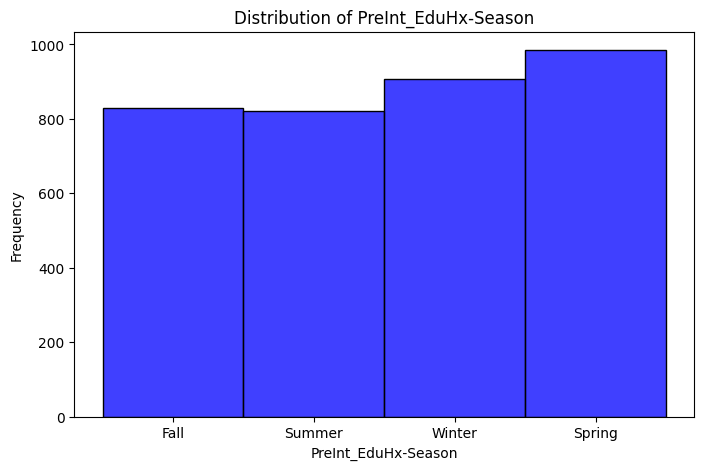

In [21]:
missing_columns = ['CGAS-Season', 'Physical-Season', 'FE-Season', 'FGC-Season',
                   'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season', 'PCIAT-Season',
                   'SDS-Season', 'PreInt_EduHx-Season']

for col in missing_columns:
    if col in data.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[col].dropna(), kde=False, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
پر کردن missing values ستونهای غیر عددی با استفاده از توزیع تصادفی
</p>

In [22]:
season_data = data[missing_columns]

# تعریف دیکشنری نگاشت
mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}

# اعمال نگاشت بر روی هر ستون
for col in missing_columns:
    season_data[col] = season_data[col].map(mapping)

<ipython-input-22-2c3bda2b1835>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data[col] = season_data[col].map(mapping)
<ipython-input-22-2c3bda2b1835>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data[col] = season_data[col].map(mapping)
<ipython-input-22-2c3bda2b1835>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [23]:
# حلقه برای پر کردن مقادیر گمشده
for col in season_data:

    # محاسبه توزیع مقادیر موجود در ستون (بدون مقادیر گمشده)
    value_counts = data[col].value_counts(normalize=True)

    # پیدا کردن ردیف‌های دارای مقدار گمشده
    missing_indices = data[data[col].isnull()].index

    # پر کردن مقادیر گمشده با نمونه‌گیری تصادفی از توزیع
    data.loc[missing_indices, col] = np.random.choice(value_counts.index,
                                                         size=len(missing_indices),
                                                         p=value_counts.values)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
نمایش مجدد ستون های غیر عددی بعد از پر کردن missing values برای اطمینان از درستی روش انتخابی(توزیع تصادفی)
</p>

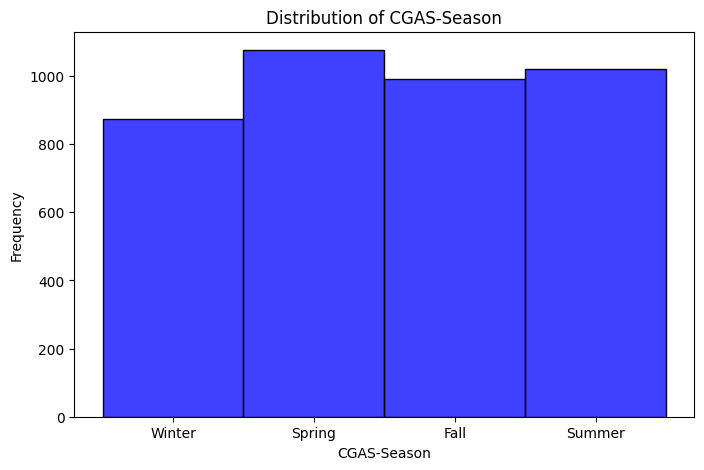

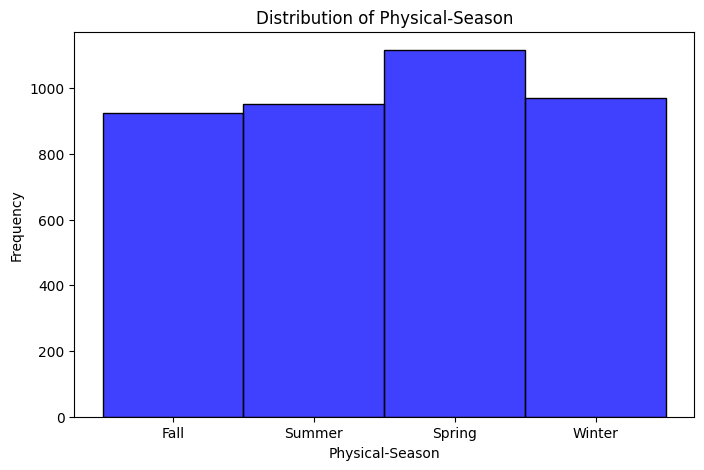

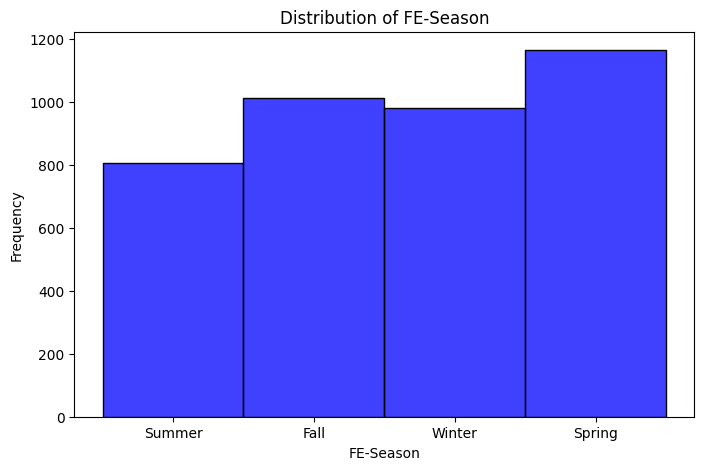

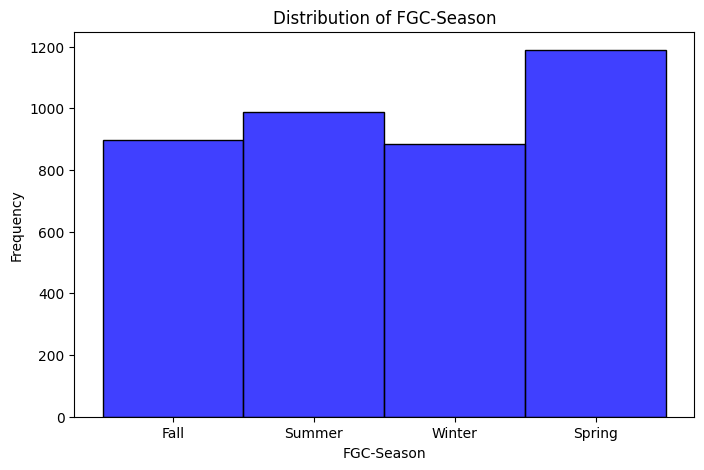

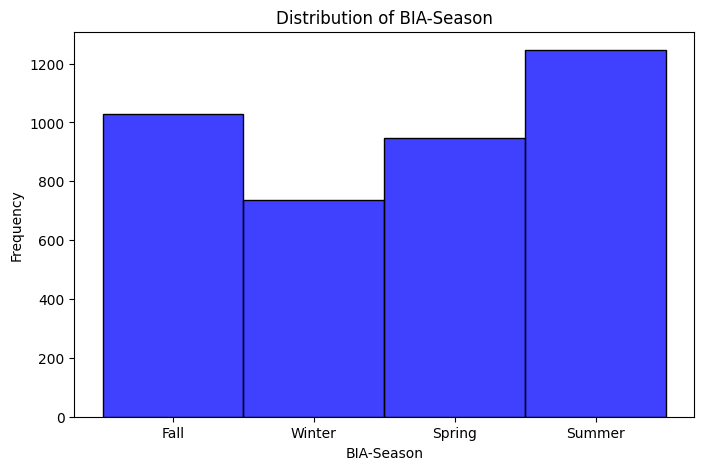

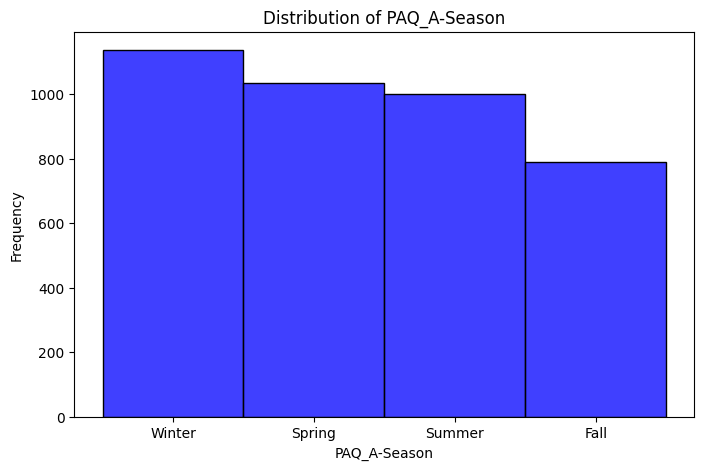

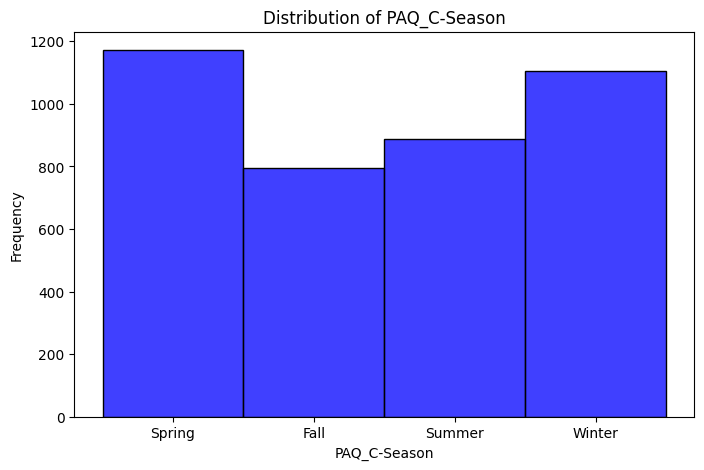

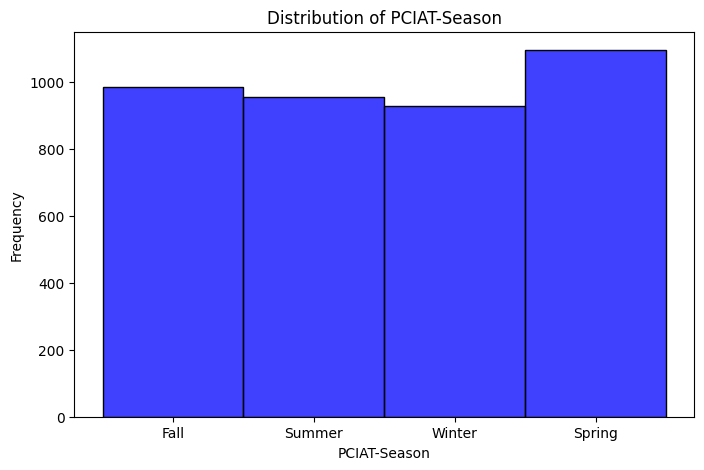

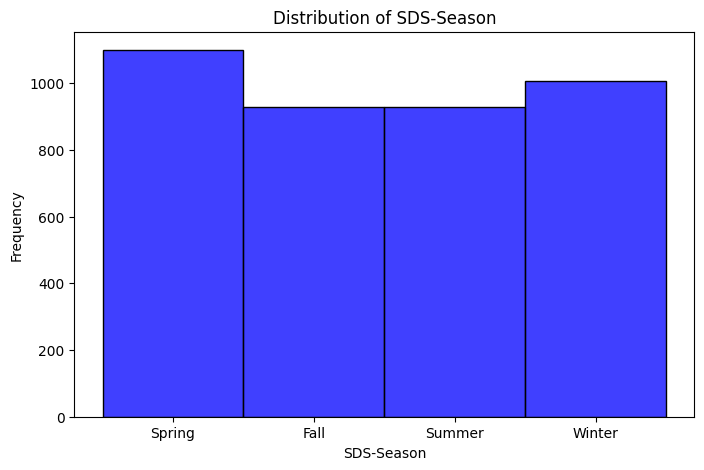

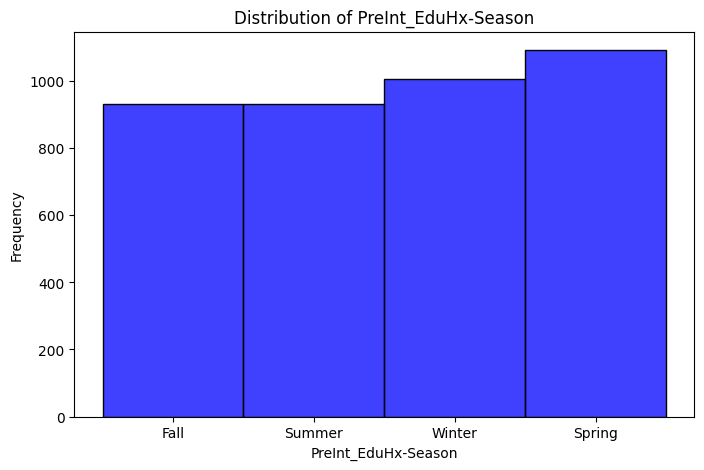

In [24]:
for col in season_data:
    if col in data.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[col].dropna(), kde=False, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
تبدیل مقادیر غیر عددی به عددی
</p>

In [25]:
categorical_columns = ['BIA-Season', 'FGC-Season', 'FE-Season', 'CGAS-Season', 'Physical-Season',
                       'PAQ_A-Season', 'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season','Enrol_Season']

label_encoders = {}  # ذخیره LabelEncoder برای هر ستون

# اعمال Label Encoding روی هر ستون
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # ذخیره Encoder برای استفاده مجدد

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
اطمینان از عددی بودن همه ستون ها
</p>

In [26]:
# شناسایی ستون‌هایی که عددی نیستند
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns in x_train:")
print(non_numeric_columns)

Non-numeric columns in x_train:
Index(['id'], dtype='object')


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
نمایش corrolation  ستون ها
</p>

Correlation with sii:
sii                  1.000000
PCIAT-PCIAT_Total    0.744537
PCIAT-PCIAT_15       0.529812
PCIAT-PCIAT_18       0.514811
PCIAT-PCIAT_20       0.496914
                       ...   
FGC-FGC_SRR_Zone    -0.022075
FGC-FGC_TL_Zone     -0.025852
CGAS-Score          -0.028699
Sex                 -0.057088
FGC-FGC_SRL_Zone    -0.065017
Length: 75, dtype: float64


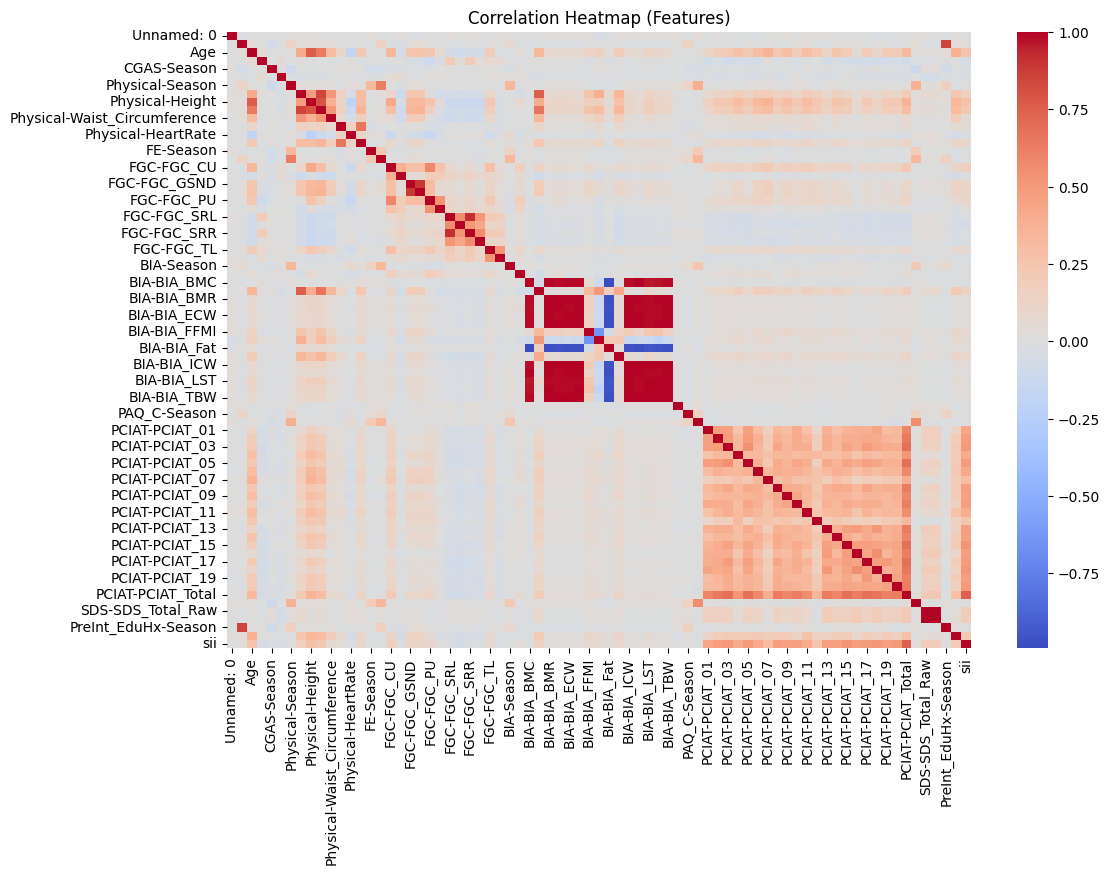

In [27]:
# ذخیره ستون id در یک متغیر جداگانه
id_column = data['id']

# حذف موقت ستون id از DataFrame
data_filtered = data.drop(columns=['id'])

# محاسبه همبستگی ستون‌های ویژگی با `sii`
correlation_with_target = data_filtered.corrwith(data_filtered['sii'])
print("Correlation with sii:")
print(correlation_with_target.sort_values(ascending=False))

# رسم Heatmap برای نمایش همبستگی کلی

plt.figure(figsize=(12, 8))
sns.heatmap(data_filtered.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Features)")
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
شناسایی جفت ستون هایی که corrolation بالایی دارن
</p>

In [28]:
# محاسبه ماتریس همبستگی
correlation_matrix = data_filtered.corr()

# شناسایی جفت ویژگی‌هایی با همبستگی بالا
high_corr_pairs = []
threshold = 0.9  # آستانه همبستگی بالا
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold:
            high_corr_pairs.append((col1, col2))

print("Highly correlated feature pairs:")
print(high_corr_pairs)

Highly correlated feature pairs:
[('FGC-FGC_SRL', 'FGC-FGC_SRR'), ('FGC-FGC_SRR', 'FGC-FGC_SRL'), ('BIA-BIA_BMC', 'BIA-BIA_BMR'), ('BIA-BIA_BMC', 'BIA-BIA_DEE'), ('BIA-BIA_BMC', 'BIA-BIA_ECW'), ('BIA-BIA_BMC', 'BIA-BIA_FFM'), ('BIA-BIA_BMC', 'BIA-BIA_Fat'), ('BIA-BIA_BMC', 'BIA-BIA_ICW'), ('BIA-BIA_BMC', 'BIA-BIA_LDM'), ('BIA-BIA_BMC', 'BIA-BIA_LST'), ('BIA-BIA_BMC', 'BIA-BIA_SMM'), ('BIA-BIA_BMC', 'BIA-BIA_TBW'), ('BIA-BIA_BMR', 'BIA-BIA_BMC'), ('BIA-BIA_BMR', 'BIA-BIA_DEE'), ('BIA-BIA_BMR', 'BIA-BIA_ECW'), ('BIA-BIA_BMR', 'BIA-BIA_FFM'), ('BIA-BIA_BMR', 'BIA-BIA_Fat'), ('BIA-BIA_BMR', 'BIA-BIA_ICW'), ('BIA-BIA_BMR', 'BIA-BIA_LDM'), ('BIA-BIA_BMR', 'BIA-BIA_LST'), ('BIA-BIA_BMR', 'BIA-BIA_SMM'), ('BIA-BIA_BMR', 'BIA-BIA_TBW'), ('BIA-BIA_DEE', 'BIA-BIA_BMC'), ('BIA-BIA_DEE', 'BIA-BIA_BMR'), ('BIA-BIA_DEE', 'BIA-BIA_ECW'), ('BIA-BIA_DEE', 'BIA-BIA_FFM'), ('BIA-BIA_DEE', 'BIA-BIA_Fat'), ('BIA-BIA_DEE', 'BIA-BIA_ICW'), ('BIA-BIA_DEE', 'BIA-BIA_LDM'), ('BIA-BIA_DEE', 'BIA-BIA_LST'), ('BIA-

In [29]:
# چاپ همبستگی ستون‌های همبسته با `sii`
print("Correlation of highly correlated columns with `sii`:")
for pair in high_corr_pairs:
    col1, col2 = pair
    print(f"{col1}: {correlation_with_target[col1]}, {col2}: {correlation_with_target[col2]}")

Correlation of highly correlated columns with `sii`:
FGC-FGC_SRL: -0.013004030716366804, FGC-FGC_SRR: -0.0043805760362442435
FGC-FGC_SRR: -0.0043805760362442435, FGC-FGC_SRL: -0.013004030716366804
BIA-BIA_BMC: -0.00714268415701321, BIA-BIA_BMR: 0.02162355279965171
BIA-BIA_BMC: -0.00714268415701321, BIA-BIA_DEE: 0.030446870297520606
BIA-BIA_BMC: -0.00714268415701321, BIA-BIA_ECW: 0.02065030386416106
BIA-BIA_BMC: -0.00714268415701321, BIA-BIA_FFM: 0.021623530062618784
BIA-BIA_BMC: -0.00714268415701321, BIA-BIA_Fat: 0.025948466763911972
BIA-BIA_BMC: -0.00714268415701321, BIA-BIA_ICW: 0.03156836594372647
BIA-BIA_BMC: -0.00714268415701321, BIA-BIA_LDM: 0.014566978984043027
BIA-BIA_BMC: -0.00714268415701321, BIA-BIA_LST: 0.04569397742158443
BIA-BIA_BMC: -0.00714268415701321, BIA-BIA_SMM: 0.031628368472111944
BIA-BIA_BMC: -0.00714268415701321, BIA-BIA_TBW: 0.025431897476470584
BIA-BIA_BMR: 0.02162355279965171, BIA-BIA_BMC: -0.00714268415701321
BIA-BIA_BMR: 0.02162355279965171, BIA-BIA_DEE: 0.

In [30]:
# لیست ستون‌هایی که باید حذف شوند
columns_to_drop = []

for col1, col2 in high_corr_pairs:
    if correlation_with_target[col1] > correlation_with_target[col2]:
        columns_to_drop.append(col2)
    else:
        columns_to_drop.append(col1)

print(f"Columns dropped due to high correlation: {columns_to_drop}")

Columns dropped due to high correlation: ['FGC-FGC_SRL', 'FGC-FGC_SRL', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_BMR', 'BIA-BIA_BMR', 'BIA-BIA_LDM', 'BIA-BIA_BMR', 'BIA-BIA_BMR', 'BIA-BIA_BMR', 'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_Fat', 'BIA-BIA_DEE', 'BIA-BIA_LDM', 'BIA-BIA_DEE', 'BIA-BIA_DEE', 'BIA-BIA_TBW', 'BIA-BIA_BMC', 'BIA-BIA_ECW', 'BIA-BIA_ECW', 'BIA-BIA_ECW', 'BIA-BIA_ECW', 'BIA-BIA_ECW', 'BIA-BIA_LDM', 'BIA-BIA_ECW', 'BIA-BIA_ECW', 'BIA-BIA_ECW', 'BIA-BIA_BMC', 'BIA-BIA_FFM', 'BIA-BIA_FFM', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFM', 'BIA-BIA_LDM', 'BIA-BIA_FFM', 'BIA-BIA_FFM', 'BIA-BIA_FFM', 'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_Fat', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_Fat', 'BIA-BIA_LDM', 'BIA-BIA_Fat', 'BIA-BIA_Fat', 'BIA-BIA_TBW', 'BIA-BIA_BMC', 'BIA-BIA_BMR'

In [31]:
print(len(data_filtered.columns))

75


In [32]:
# حذف ستون‌های انتخاب‌ شده
columns_to_drop = list(set(columns_to_drop))  # حذف تکراری‌ها
data_filtered = data_filtered.drop(columns=columns_to_drop)

In [33]:
print(len(data_filtered.columns))

63


In [35]:
# اضافه کردن ستون id به DataFrame
data_filtered['id'] = id_column